plotting pid as a function of prediction

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print(sns.__version__)
from matplotlib.colors import LogNorm, Normalize

path_to_db = "/groups/icecube/peter/storage/Multiclassification/Test/last_one_lvl3MC/dynedge_pid_test_run/results.csv"
feature_data = pd.read_csv(path_to_db)

0.12.1


In [69]:
preds = ["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]
pids = [1,12,13]

In [70]:
## transform data
# remove anti
feature_data['pid'] = feature_data['pid'].apply(abs)
# make all neutrinos the same class; to match prediction
feature_data.loc[feature_data['pid']==14, "pid"]=12
feature_data.loc[feature_data['pid']==16, "pid"]=12

In [168]:
a = feature_data[["pid_noise_pred","pid"]].groupby(by="pid")
b = feature_data[["pid_muon_pred","pid"]].groupby(by="pid")
c = feature_data[["pid_neutrino_pred","pid"]].groupby(by="pid")
a.value_counts()

pid   pid_noise_pred
1.0   1.000000e+00      3263
      9.936540e-01         2
      9.979399e-01         2
      9.883731e-01         2
      9.958396e-01         2
                        ... 
13.0  4.554880e-12         1
      4.531656e-12         1
      4.531099e-12         1
      4.511483e-12         1
      9.951838e-01         1
Length: 29349, dtype: int64

In [122]:
preds = ["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]
pids = [1,12,13]
color=["b","y","g"]
for i, pred in enumerate(preds):
    pid_list=[]
    pid_histlist=[]
    pid_bin_centers=[]

    temp = 0
    for i, pid in enumerate(pids):
        y, bin_edges = np.histogram(feature_data[pred].loc[feature_data["pid"]==pid], bins=50)
        pid_list.append(feature_data[pred].loc[feature_data["pid"]==pid])
        if i >= 0:
            pid_histlist.append(y+temp)
        else:
            pid_histlist.append(y)
        temp = y
        pid_bin_centers.append(0.5*(bin_edges[1:] + bin_edges[:-1]))

    print(pid_list)
    break
    sns.histplot(
    pid_list, x="pid_noise_pred", y="pid_muon_pred", hue="pid",
        bins=50, cbar=True, log_scale=True
    )

[0        0.967094
2        0.623522
6        1.000000
9        0.846743
15       0.984564
           ...   
32976    1.000000
32979    0.980119
32985    0.924875
32988    1.000000
32990    0.978678
Name: pid_noise_pred, Length: 6559, dtype: float64, 1        1.476296e-09
3        1.150592e-02
4        3.382895e-07
7        1.855778e-14
8        5.308883e-05
             ...     
32992    1.532910e-07
32993    2.971106e-08
32995    1.027378e-05
32996    1.318803e-11
32999    3.719980e-09
Name: pid_noise_pred, Length: 19779, dtype: float64, 5        3.977881e-16
10       6.895918e-09
11       1.495949e-06
19       2.584643e-12
21       7.359793e-11
             ...     
32987    2.821006e-16
32991    1.310348e-06
32994    1.388225e-13
32997    3.247883e-14
32998    4.629225e-07
Name: pid_noise_pred, Length: 6662, dtype: float64]


/tmp/ipykernel_18370/3221103619.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a.pid_noise_pred)


ValueError: setting an array element with a sequence.

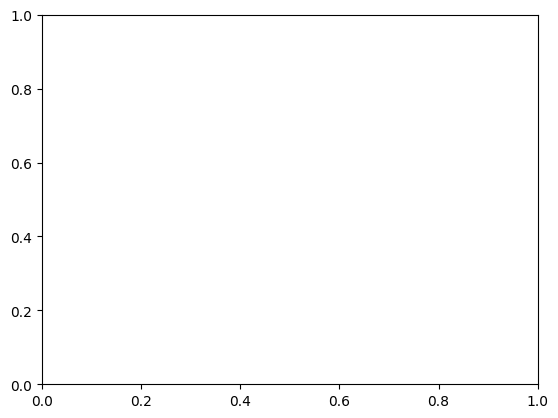

/groups/icecube/qgf305/anaconda3/envs/graphnet/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/groups/icecube/qgf305/anaconda3/envs/graphnet/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: autodetected range of [-inf, 0.0] is not finite

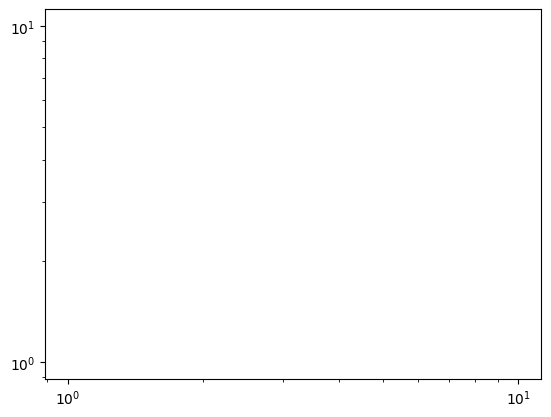

In [72]:

sns.histplot(
    feature_data, x="pid_noise_pred", y="pid_muon_pred", hue="pid",
    bins=50, cbar=True, log_scale=True
)

ValueError: x and y must have the same length.

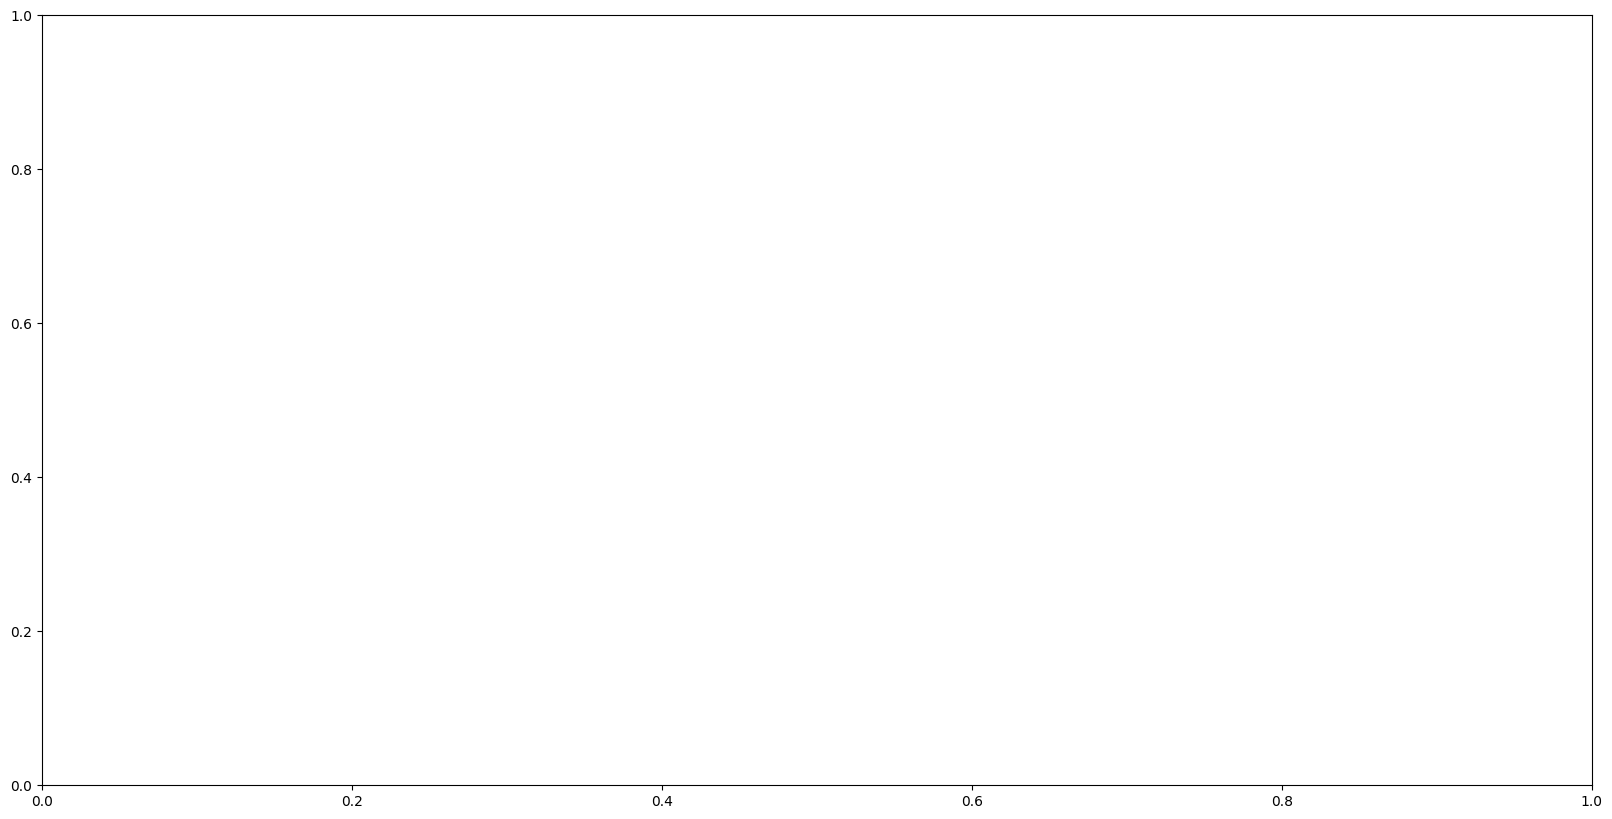

In [8]:
preds = ["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]
pids = [1,12,13]
color=["b","y","g"]
for i, pred in enumerate(preds):
    pid_list=[]
    pid_histlist=[]
    pid_bin_centers=[]
    
    plt.figure(figsize=(20,10))

    temp = 0
    for i, pid in enumerate(pids):
        pid_list.append(feature_data[pred].loc[feature_data["pid"]==pid])
    
    plt.hist2d(pid_list[0],pid_list[1], bins=50, log=True)
    plt.title(pred.replace("_"," ")[4:])
    plt.legend()
    plt.yscale("log")
    plt.savefig("/groups/icecube/qgf305/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/distributions/test_plot/"+pred.replace("_","")[3:-4]+"2D.png")